define the function to analyze behavioral file

In [64]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

def analyze_data(name, dict_path):
    # Load data
    filename = dict_path + name
    data = scipy.io.loadmat(filename)

    beh = data['beh'][0]
    beh_df = pd.DataFrame(beh)

    num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

    overall_cond = np.zeros(num_cond)
    correct_cond = np.zeros(num_cond)
    RT_cond = np.full((num_cond, 200), np.nan)

    for _, row in beh_df.iterrows():
        for i in range(1, num_cond + 1):  # MATLAB indices start from 1
            if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
                overall_cond[i-1] += 1  # Adjust for 0-based indexing

                if row['TrialError'] == 0:
                    correct_cond[i-1] += 1
                    RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

    mean_RT = np.nanmean(RT_cond, axis=1)
    cond_performance = correct_cond / overall_cond

    # Plotting Performance
    plt.figure()
    plt.bar(range(1, num_cond+1), cond_performance, color='lightgreen', label='Match trials')  # Changed color to lightgreen
    plt.xlabel('Conditions')
    plt.ylabel('Performance')
    plt.title('Performance ' + name)

    # Change color for specific bars to blue (if you still want to differentiate them)
    plt.bar(range(9, 17), cond_performance[8:16], color='blue', label='Nonmatch trials')
    plt.bar(range(25, 33), cond_performance[24:32], color='blue')  # Assuming there are at least 32 conditions
    # plt.bar(range(41, 49), cond_performance[40:48], color='blue')  # Assuming there are at least 32 conditions

    # Move legend outside the figure
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Calculate mean performance for different groups of bars
    mean_performance_1_8 = np.mean(cond_performance[:8])
    mean_performance_9_16 = np.mean(cond_performance[8:16])
    mean_performance_17_24 = np.mean(cond_performance[16:24])
    mean_performance_25_32 = np.mean(cond_performance[24:32])
    # mean_performance_33_40 = np.mean(cond_performance[32:40])
    # mean_performance_41_48 = np.mean(cond_performance[40:48])

    # Define the data
    # data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep', 'Nonmatch_4_rep', 'Match_4_rep'],
    #         'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32, mean_performance_33_40, mean_performance_41_48]}

    data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep'],
            'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32]}
    # Create a DataFrame
    df = pd.DataFrame(data)

    # Format the 'Mean Performance' column to have only two digits after the decimal point
    df['Mean Performance'] = df['Mean Performance'].apply(lambda x: f'{x:.2f}')

    print(name)
    print(df['Mean Performance'])


    # calculate mean performance based on direction of 1st cue
    # Calculate mean performance for each group
    group1 = [9, 12, 8, 7]
    group2 = [10, 11, 5, 6]
    group3 = [13, 15, 4, 2]
    group4 = [14, 16, 1, 3]

    mean_performance_group1 = np.mean([cond_performance[i-1] for i in group1])
    mean_performance_group2 = np.mean([cond_performance[i-1] for i in group2])
    mean_performance_group3 = np.mean([cond_performance[i-1] for i in group3])
    mean_performance_group4 = np.mean([cond_performance[i-1] for i in group4])

    # Print mean performances
    print(f"Performance for Cat 11_2rep (Conditions {group1}): {mean_performance_group1:.2f}")
    print(f"Performance for Cat 12_2rep (Conditions {group2}): {mean_performance_group2:.2f}")
    print(f"Performance for Cat 21_2rep (Conditions {group3}): {mean_performance_group3:.2f}")
    print(f"Performance for Cat 22_2rep (Conditions {group4}): {mean_performance_group4:.2f}")

    # calculate mean performance based on direction of 1st cue
    # Calculate mean performance for each group_3 repitition
    group1 = [17, 18, 25, 26]
    group2 = [19, 20, 27, 28]
    group3 = [21, 22, 29, 30]
    group4 = [23, 24, 31, 32]

    mean_group1_3rep = np.mean([cond_performance[i-1] for i in group1])
    mean_group2_3rep = np.mean([cond_performance[i-1] for i in group2])
    mean_group3_3rep = np.mean([cond_performance[i-1] for i in group3])
    mean_group4_3rep = np.mean([cond_performance[i-1] for i in group4])

    # Print mean performances
    print(f"Performance for Cat 11_2rep (Conditions {group1}): {mean_group1_3rep:.2f}")
    print(f"Performance for Cat 12_2rep (Conditions {group2}): {mean_group2_3rep:.2f}")
    print(f"Performance for Cat 21_2rep (Conditions {group3}): {mean_group3_3rep:.2f}")
    print(f"Performance for Cat 22_2rep (Conditions {group4}): {mean_group4_3rep:.2f}")

    print('finished')



20231025_Sly_MMN_steps.mat
0    0.82
1    0.68
2    0.79
3    0.60
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.76
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.79
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.65
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.82
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.64
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.76
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.65
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.74
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


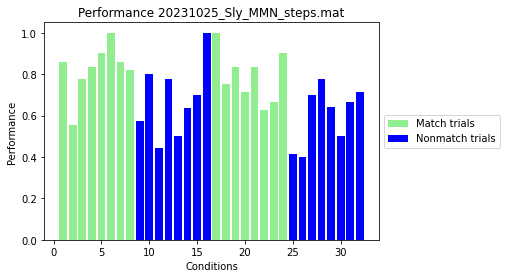

In [65]:
# Call the function
name = "20231025_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231026_Sly_MMN_steps.mat
0    0.88
1    0.55
2    0.89
3    0.57
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.57
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.93
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.71
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.64
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.78
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.71
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.74
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.69
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


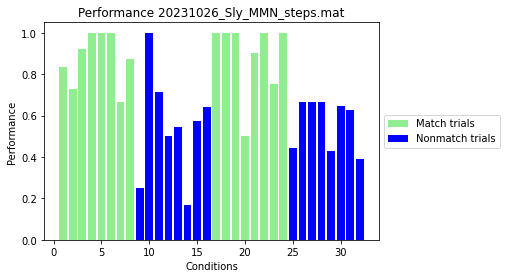

In [66]:
# Call the function
name = "20231026_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231031_Sly_MMN_steps.mat
0    0.82
1    0.58
2    0.96
3    0.51
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.62
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.90
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.71
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.57
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.77
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.76
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.77
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.64
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


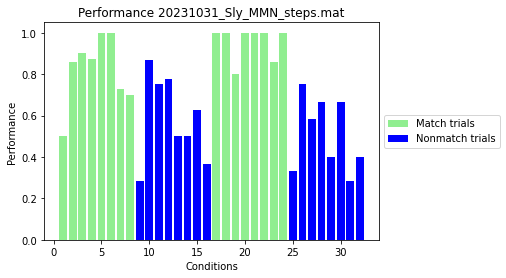

In [67]:
# Call the function
name = "20231031_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231103_Sly_MMN_steps.mat
0    0.84
1    0.80
2    0.85
3    0.58
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.54
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.91
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.93
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.89
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.70
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.62
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.83
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.71
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


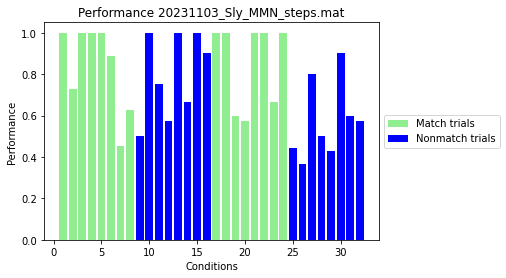

In [68]:
# Call the function
name = "20231103_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231107_Sly_MMN_steps.mat
0    0.69
1    0.79
2    0.83
3    0.74
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.26
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.93
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.79
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 1.00
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.88
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.68
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.81
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.78
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)
C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:30: RuntimeWarning: invalid value encountered in divide
  cond_performance = correct_cond / overall_cond


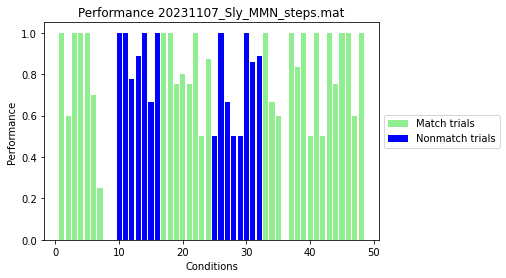

In [69]:
# Call the function
name = "20231107_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231113_Sly_MMN_steps.mat
0    0.79
1    0.58
2    0.83
3    0.48
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.70
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.85
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.51
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.69
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.77
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.45
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.76
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.63
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


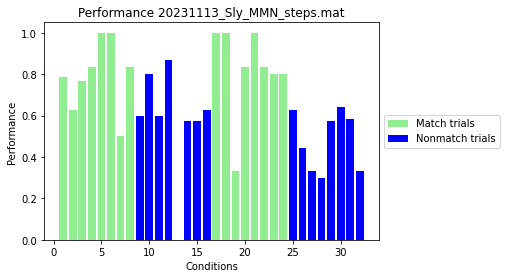

In [70]:
# Call the function
name = "20231113_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


20231115_Sly_MMN_steps.mat
0    0.81
1    0.77
2    0.89
3    0.50
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.75
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.92
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.67
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.83
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.86
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.64
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.75
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.53
finished


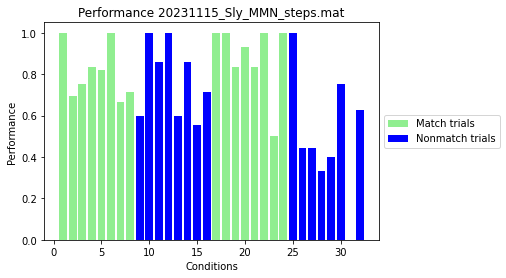

In [71]:
# Call the function
name = "20231115_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231116_Sly_MMN_steps.mat
0    0.55
1    0.91
2    0.73
3    0.82
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.60
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.93
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.70
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.68
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.96
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.66
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.77
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.71
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


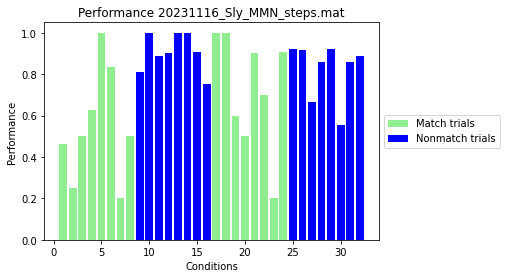

In [72]:
# Call the function
name = "20231116_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231120_Sly_MMN_steps.mat
0    0.42
1    0.96
2    0.70
3    0.95
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.69
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.77
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.63
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.67
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.94
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.75
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.72
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.88
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


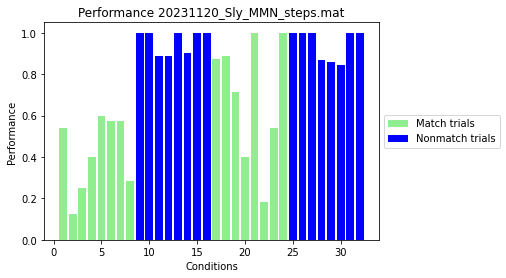

In [73]:
# Call the function
name = "20231120_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


20231129_Sly_MMN_steps(1).mat
0    0.59
1    0.63
2    0.86
3    0.74
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.69
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.80
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.42
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.54
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.93
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.86
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.64
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.77
finished


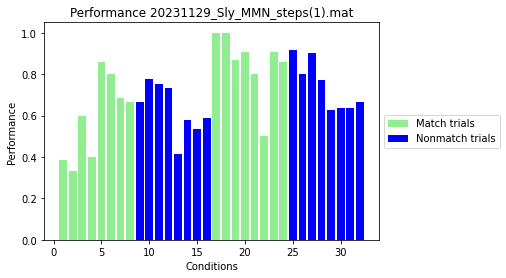

In [74]:
# Call the function
name = "20231129_Sly_MMN_steps(1).mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231204_Sly_MMN_steps(1).mat
0    0.67
1    0.70
2    0.89
3    0.60
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.72
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.98
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.47
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.57
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.87
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.84
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.59
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.68
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


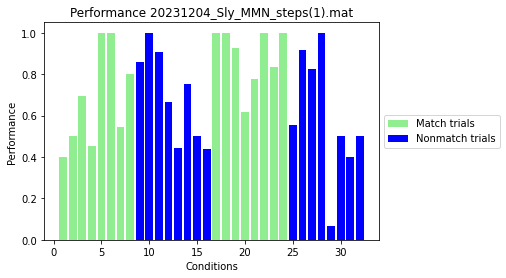

In [75]:
# Call the function
name = "20231204_Sly_MMN_steps(1).mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231205_Sly_MMN_steps.mat
0    0.82
1    0.86
2    0.90
3    0.70
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.75
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.92
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.81
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.88
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.87
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.71
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.78
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.82
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


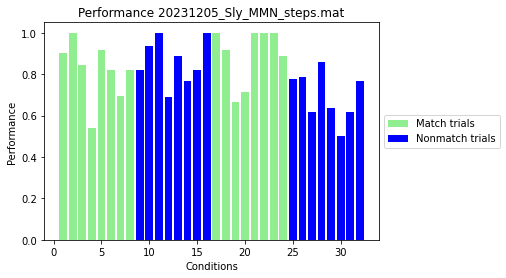

In [76]:
# Call the function
name = "20231205_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231206_Sly_MMN_steps.mat
0    0.78
1    0.91
2    0.91
3    0.70
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.86
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.95
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.73
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.85
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.98
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.80
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.71
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.74
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


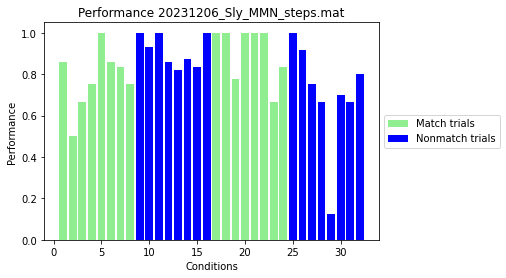

In [77]:
# Call the function
name = "20231206_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

20231207_Sly_MMN_steps.mat
0    0.71
1    0.86
2    0.94
3    0.69
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.77
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.93
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.69
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.76
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.73
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.81
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.89
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.82
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


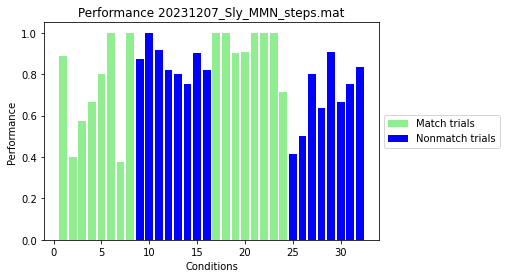

In [80]:
# Call the function
name = "20231207_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\3085444522.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


20231208_Sly_MMN_steps(1).mat
0    0.80
1    0.78
2    0.87
3    0.62
Name: Mean Performance, dtype: object
Performance for Cat 11_2rep (Conditions [9, 12, 8, 7]): 0.76
Performance for Cat 12_2rep (Conditions [10, 11, 5, 6]): 0.83
Performance for Cat 21_2rep (Conditions [13, 15, 4, 2]): 0.76
Performance for Cat 22_2rep (Conditions [14, 16, 1, 3]): 0.81
Performance for Cat 11_2rep (Conditions [17, 18, 25, 26]): 0.67
Performance for Cat 12_2rep (Conditions [19, 20, 27, 28]): 0.87
Performance for Cat 21_2rep (Conditions [21, 22, 29, 30]): 0.72
Performance for Cat 22_2rep (Conditions [23, 24, 31, 32]): 0.73
finished


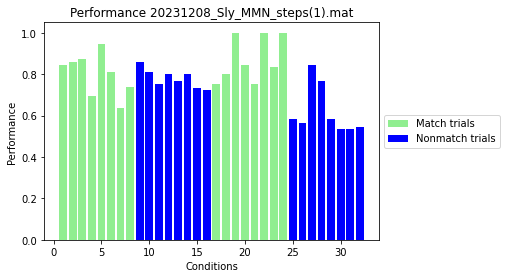

In [78]:
# Call the function
name = "20231208_Sly_MMN_steps(1).mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)